In [93]:
import re #pacchetto per espressioni regolari
import os #pacchetto per muoversi nelle cartelle
import sys
sys.path.append('..')  # Add parent directory to the Python path
from utils.helpers import *


In [94]:
conllu_dir = 'data/profiling_output/11325/'

In [95]:
all_documents = []
for file_name in os.listdir(conllu_dir):
    file_path = os.path.join(conllu_dir, file_name)
    document = Document(file_path)
    load_document_sentences(document)
    all_documents.append(document)

In [96]:
sample_document = all_documents[0]
for sentence in sample_document.sentences[:2]:
    tokens = [token.word for token in sentence.tokens]
    print(' - '.join(tokens))
    print('\n_________________\n')

Bella - Tommy - come - butta - ?

_________________

Ho - saputo - che - stai - entrando - in - 5ª - e - che - a - i - strizza - soprattutto - su - italiano - e - in - i - compiti - di - scrittura - .

_________________



In [97]:
extract_documents_ngrams(all_documents)

In [98]:
sample_document.features

{'WORD_1_Bella': 1,
 'WORD_1_Tommy': 1,
 'WORD_1_come': 3,
 'WORD_1_butta': 1,
 'WORD_1_?': 2,
 'WORD_2_Bella_Tommy': 1,
 'WORD_2_Tommy_come': 1,
 'WORD_2_come_butta': 1,
 'WORD_2_butta_?': 1,
 'CHAR_1_B': 1,
 'CHAR_1_e': 119,
 'CHAR_1_l': 43,
 'CHAR_1_a': 118,
 'CHAR_1_ ': 284,
 'CHAR_1_T': 1,
 'CHAR_1_o': 92,
 'CHAR_1_m': 40,
 'CHAR_1_y': 1,
 'CHAR_1_c': 48,
 'CHAR_1_b': 5,
 'CHAR_1_u': 44,
 'CHAR_1_t': 80,
 'CHAR_1_?': 2,
 'CHAR_2_Be': 1,
 'CHAR_2_el': 3,
 'CHAR_2_ll': 4,
 'CHAR_2_la': 15,
 'CHAR_2_a ': 51,
 'CHAR_2_ T': 1,
 'CHAR_2_To': 1,
 'CHAR_2_om': 15,
 'CHAR_2_mm': 1,
 'CHAR_2_my': 1,
 'CHAR_2_y ': 1,
 'CHAR_2_ c': 31,
 'CHAR_2_co': 22,
 'CHAR_2_me': 5,
 'CHAR_2_e ': 54,
 'CHAR_2_ b': 4,
 'CHAR_2_bu': 1,
 'CHAR_2_ut': 9,
 'CHAR_2_tt': 11,
 'CHAR_2_ta': 9,
 'CHAR_2_ ?': 2,
 'WORD_1_Ho': 1,
 'WORD_1_saputo': 1,
 'WORD_1_che': 4,
 'WORD_1_stai': 1,
 'WORD_1_entrando': 1,
 'WORD_1_in': 6,
 'WORD_1_5ª': 2,
 'WORD_1_e': 9,
 'WORD_1_a': 9,
 'WORD_1_i': 7,
 'WORD_1_strizza': 1,
 'WOR

In [99]:
extract_documents_ngrams_normalized(all_documents)


In [100]:
def train_test_split(all_documents):
    train_features_dict, train_labels = [], []
    test_features_dict, test_labels = [], []
    
    for document in all_documents:
        if document.split == 'training':
            train_features_dict.append(document.features)
            train_labels.append(document.gender)
        else:
            test_features_dict.append(document.features)
            test_labels.append(document.gender)
    
    return train_features_dict, train_labels, test_features_dict, test_labels

In [101]:
train_features_dict, train_labels, test_features_dict, test_labels = train_test_split(all_documents)

In [102]:
len(train_features_dict), len(train_labels), len(test_features_dict), len(test_labels)


(200, 200, 200, 200)

In [103]:
get_num_features(train_features_dict)
print(f'Numero features: {get_num_features(train_features_dict)}')

Numero features: 53316


In [104]:
train_features_dict = filter_features(train_features_dict, 5)
print(f'Numero features dopo il filtro: {get_num_features(train_features_dict)}')

Numero features dopo il filtro: 3682


In [105]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(train_features_dict)

In [106]:
vectorizer.get_feature_names_out(X_train).tolist()

['CHAR_1_ ',
 'CHAR_1_!',
 'CHAR_1_"',
 "CHAR_1_'",
 'CHAR_1_(',
 'CHAR_1_)',
 'CHAR_1_*',
 'CHAR_1_,',
 'CHAR_1_-',
 'CHAR_1_.',
 'CHAR_1_/',
 'CHAR_1_0',
 'CHAR_1_1',
 'CHAR_1_2',
 'CHAR_1_3',
 'CHAR_1_4',
 'CHAR_1_5',
 'CHAR_1_6',
 'CHAR_1_7',
 'CHAR_1_8',
 'CHAR_1_9',
 'CHAR_1_:',
 'CHAR_1_;',
 'CHAR_1_?',
 'CHAR_1_A',
 'CHAR_1_B',
 'CHAR_1_C',
 'CHAR_1_D',
 'CHAR_1_E',
 'CHAR_1_F',
 'CHAR_1_G',
 'CHAR_1_H',
 'CHAR_1_I',
 'CHAR_1_J',
 'CHAR_1_K',
 'CHAR_1_L',
 'CHAR_1_M',
 'CHAR_1_N',
 'CHAR_1_O',
 'CHAR_1_P',
 'CHAR_1_Q',
 'CHAR_1_R',
 'CHAR_1_S',
 'CHAR_1_T',
 'CHAR_1_U',
 'CHAR_1_V',
 'CHAR_1_W',
 'CHAR_1_Z',
 'CHAR_1_a',
 'CHAR_1_b',
 'CHAR_1_c',
 'CHAR_1_d',
 'CHAR_1_e',
 'CHAR_1_f',
 'CHAR_1_g',
 'CHAR_1_h',
 'CHAR_1_i',
 'CHAR_1_k',
 'CHAR_1_l',
 'CHAR_1_m',
 'CHAR_1_n',
 'CHAR_1_o',
 'CHAR_1_p',
 'CHAR_1_q',
 'CHAR_1_r',
 'CHAR_1_s',
 'CHAR_1_t',
 'CHAR_1_u',
 'CHAR_1_v',
 'CHAR_1_w',
 'CHAR_1_x',
 'CHAR_1_y',
 'CHAR_1_z',
 'CHAR_1_«',
 'CHAR_1_°',
 'CHAR_1_»',
 'CHAR_1_È',

In [107]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 0.01, 0.001],  # Regularization parameter
    'dual': [True, False]
}

# Initialize SVM with linear kernel
svc = LinearSVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, refit=True)

# Fit the grid search to your data
grid_search.fit(X_train, train_labels)

# Get mean test scores across folds
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

Best parameters found: {'C': 0.1, 'dual': True}
Best score found: 0.5200000000000001


In [109]:
X_test = vectorizer.transform(test_features_dict)
X_test = scaler.transform(X_test)

In [110]:
# Get the best estimator (model) found by grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model to make predictions on new data
# For example, if you have new data X_new, you can predict its labels as follows:
predictions = best_model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
test_predictions = predictions
print(classification_report(test_labels, test_predictions, zero_division=0)) # output_dict=True

              precision    recall  f1-score   support

           F       0.59      0.75      0.66       100
           M       0.66      0.48      0.55       100

    accuracy                           0.61       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.62      0.61      0.61       200



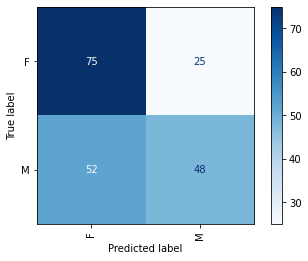

In [112]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='Blues')

In [113]:
best_model.classes_

array(['F', 'M'], dtype='<U1')

In [114]:
coefs = best_model.coef_  # ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
coefs.shape

(1, 3682)

In [115]:
features_names = vectorizer.get_feature_names_out(X_train).tolist()
features_names

['CHAR_1_ ',
 'CHAR_1_!',
 'CHAR_1_"',
 "CHAR_1_'",
 'CHAR_1_(',
 'CHAR_1_)',
 'CHAR_1_*',
 'CHAR_1_,',
 'CHAR_1_-',
 'CHAR_1_.',
 'CHAR_1_/',
 'CHAR_1_0',
 'CHAR_1_1',
 'CHAR_1_2',
 'CHAR_1_3',
 'CHAR_1_4',
 'CHAR_1_5',
 'CHAR_1_6',
 'CHAR_1_7',
 'CHAR_1_8',
 'CHAR_1_9',
 'CHAR_1_:',
 'CHAR_1_;',
 'CHAR_1_?',
 'CHAR_1_A',
 'CHAR_1_B',
 'CHAR_1_C',
 'CHAR_1_D',
 'CHAR_1_E',
 'CHAR_1_F',
 'CHAR_1_G',
 'CHAR_1_H',
 'CHAR_1_I',
 'CHAR_1_J',
 'CHAR_1_K',
 'CHAR_1_L',
 'CHAR_1_M',
 'CHAR_1_N',
 'CHAR_1_O',
 'CHAR_1_P',
 'CHAR_1_Q',
 'CHAR_1_R',
 'CHAR_1_S',
 'CHAR_1_T',
 'CHAR_1_U',
 'CHAR_1_V',
 'CHAR_1_W',
 'CHAR_1_Z',
 'CHAR_1_a',
 'CHAR_1_b',
 'CHAR_1_c',
 'CHAR_1_d',
 'CHAR_1_e',
 'CHAR_1_f',
 'CHAR_1_g',
 'CHAR_1_h',
 'CHAR_1_i',
 'CHAR_1_k',
 'CHAR_1_l',
 'CHAR_1_m',
 'CHAR_1_n',
 'CHAR_1_o',
 'CHAR_1_p',
 'CHAR_1_q',
 'CHAR_1_r',
 'CHAR_1_s',
 'CHAR_1_t',
 'CHAR_1_u',
 'CHAR_1_v',
 'CHAR_1_w',
 'CHAR_1_x',
 'CHAR_1_y',
 'CHAR_1_z',
 'CHAR_1_«',
 'CHAR_1_°',
 'CHAR_1_»',
 'CHAR_1_È',

Feature importance class F


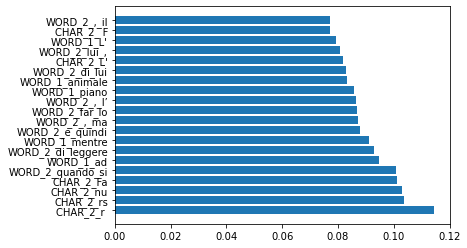

In [116]:
import matplotlib.pyplot as plt

# Assuming `coefs` is your coefficients obtained from the SVM model
# Assuming `features_names` is a list containing the names of your features
idx = 0
class_coefs = coefs[idx]

feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

num_to_plot = 20
print(f'Feature importance class {best_model.classes_[idx]}')
plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
plt.show()


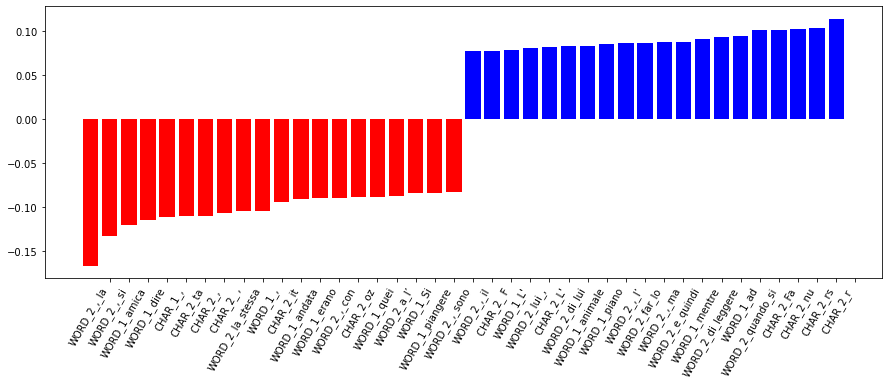

In [117]:
 coef = coefs.ravel()
 top_positive_coefficients = np.argsort(coef)[-20:]
 top_negative_coefficients = np.argsort(coef)[:20]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * 20), coef[top_coefficients], color=colors)
 feature_names = np.array(features_names)
 plt.xticks(np.arange(1, 1 + 2 * 20), feature_names[top_coefficients], rotation=60, ha="right")
 plt.show()

Feature importance class F


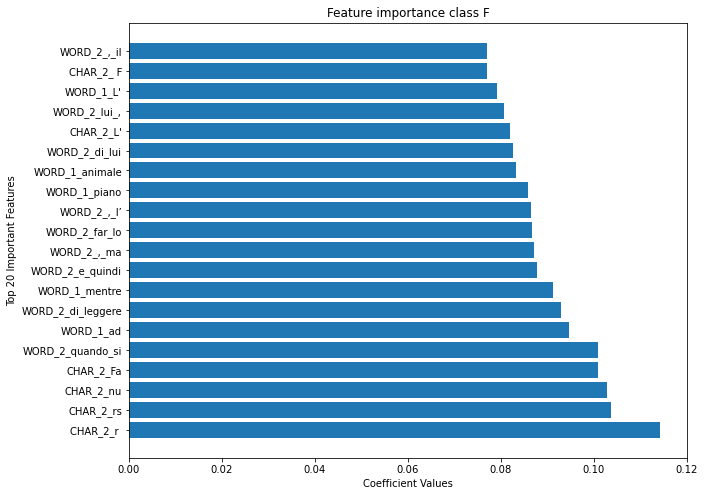

IndexError: index 1 is out of bounds for axis 0 with size 1

In [118]:
import matplotlib.pyplot as plt

# Assuming `coefs` is your coefficients obtained from the SVM model
# Assuming `features_names` is a list containing the names of your features
# Assuming `svc.classes_` contains the class labels 'F' and 'M'
for idx, class_label in enumerate(best_model.classes_):
    class_coefs = coefs[idx]

    feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
    sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

    num_to_plot = 20
    print(f'Feature importance class {class_label}')
    plt.figure(figsize=(10, 8))
    plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
    plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
    plt.title(f'Feature importance class {class_label}')
    plt.xlabel('Coefficient Values')
    plt.ylabel('Top 20 Important Features')
    plt.show()
